# Preparing the Data for Structure Learning


In [1]:
import pandas as pd
import warnings
from causalnex.structure import StructureModel
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
import causalnex_dataset_tools as cdt
import CausalnexDataset as cd


file = '../preprocess_mars_express/MarsExpressPower/marsexpress_dataset.csv'
a = cd.CausalnexDataset(dataset=file, delimiter_char=",", columns_to_drop=["ut_ms"], threshold=0)

C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:436: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")


In [2]:
#Convertimos la matriz de adyancencia del grafo en un dataframe. Nos quedamos solo con relaciones de NPWD
nodes = a.get_all_nodes()
edges = a.get_all_edges()

npwd_nodes = [x for x in nodes if "NPWD" in x]

a.edges_to_dataframe(nodes=npwd_nodes)

,source,target,weight
0,NPWD2372,NPWD2401,2.812105e-21
1,NPWD2372,NPWD2402,2.789904e-19
2,NPWD2372,NPWD2451,1.504226e-18
3,NPWD2372,NPWD2471,1.173958e-21
4,NPWD2372,NPWD2472,2.821976e-21
...,...,...,...
2302,DMC,NPWD2851,1.386642e-19
2303,DMC,NPWD2852,1.788639e-22
2304,DMC,NPWD2871,1.826080e-22
2305,DMC,NPWD2872,2.611969e-22


In [3]:
# Obtenemos los datos estadísticos de la matriz de adyancencia para planear un cribado de las relaciones espurias y menos relevantes
a.get_edges_data(nodes=npwd_nodes)

,weight
count,2.307000e+03
mean,9.972310e-11
std,1.180957e-09
min,1.455402e-26
25%,2.644942e-21
50%,8.329359e-20
75%,3.029732e-18
max,3.897610e-08


Run Image(result.draw(format='png')) to draw the graph


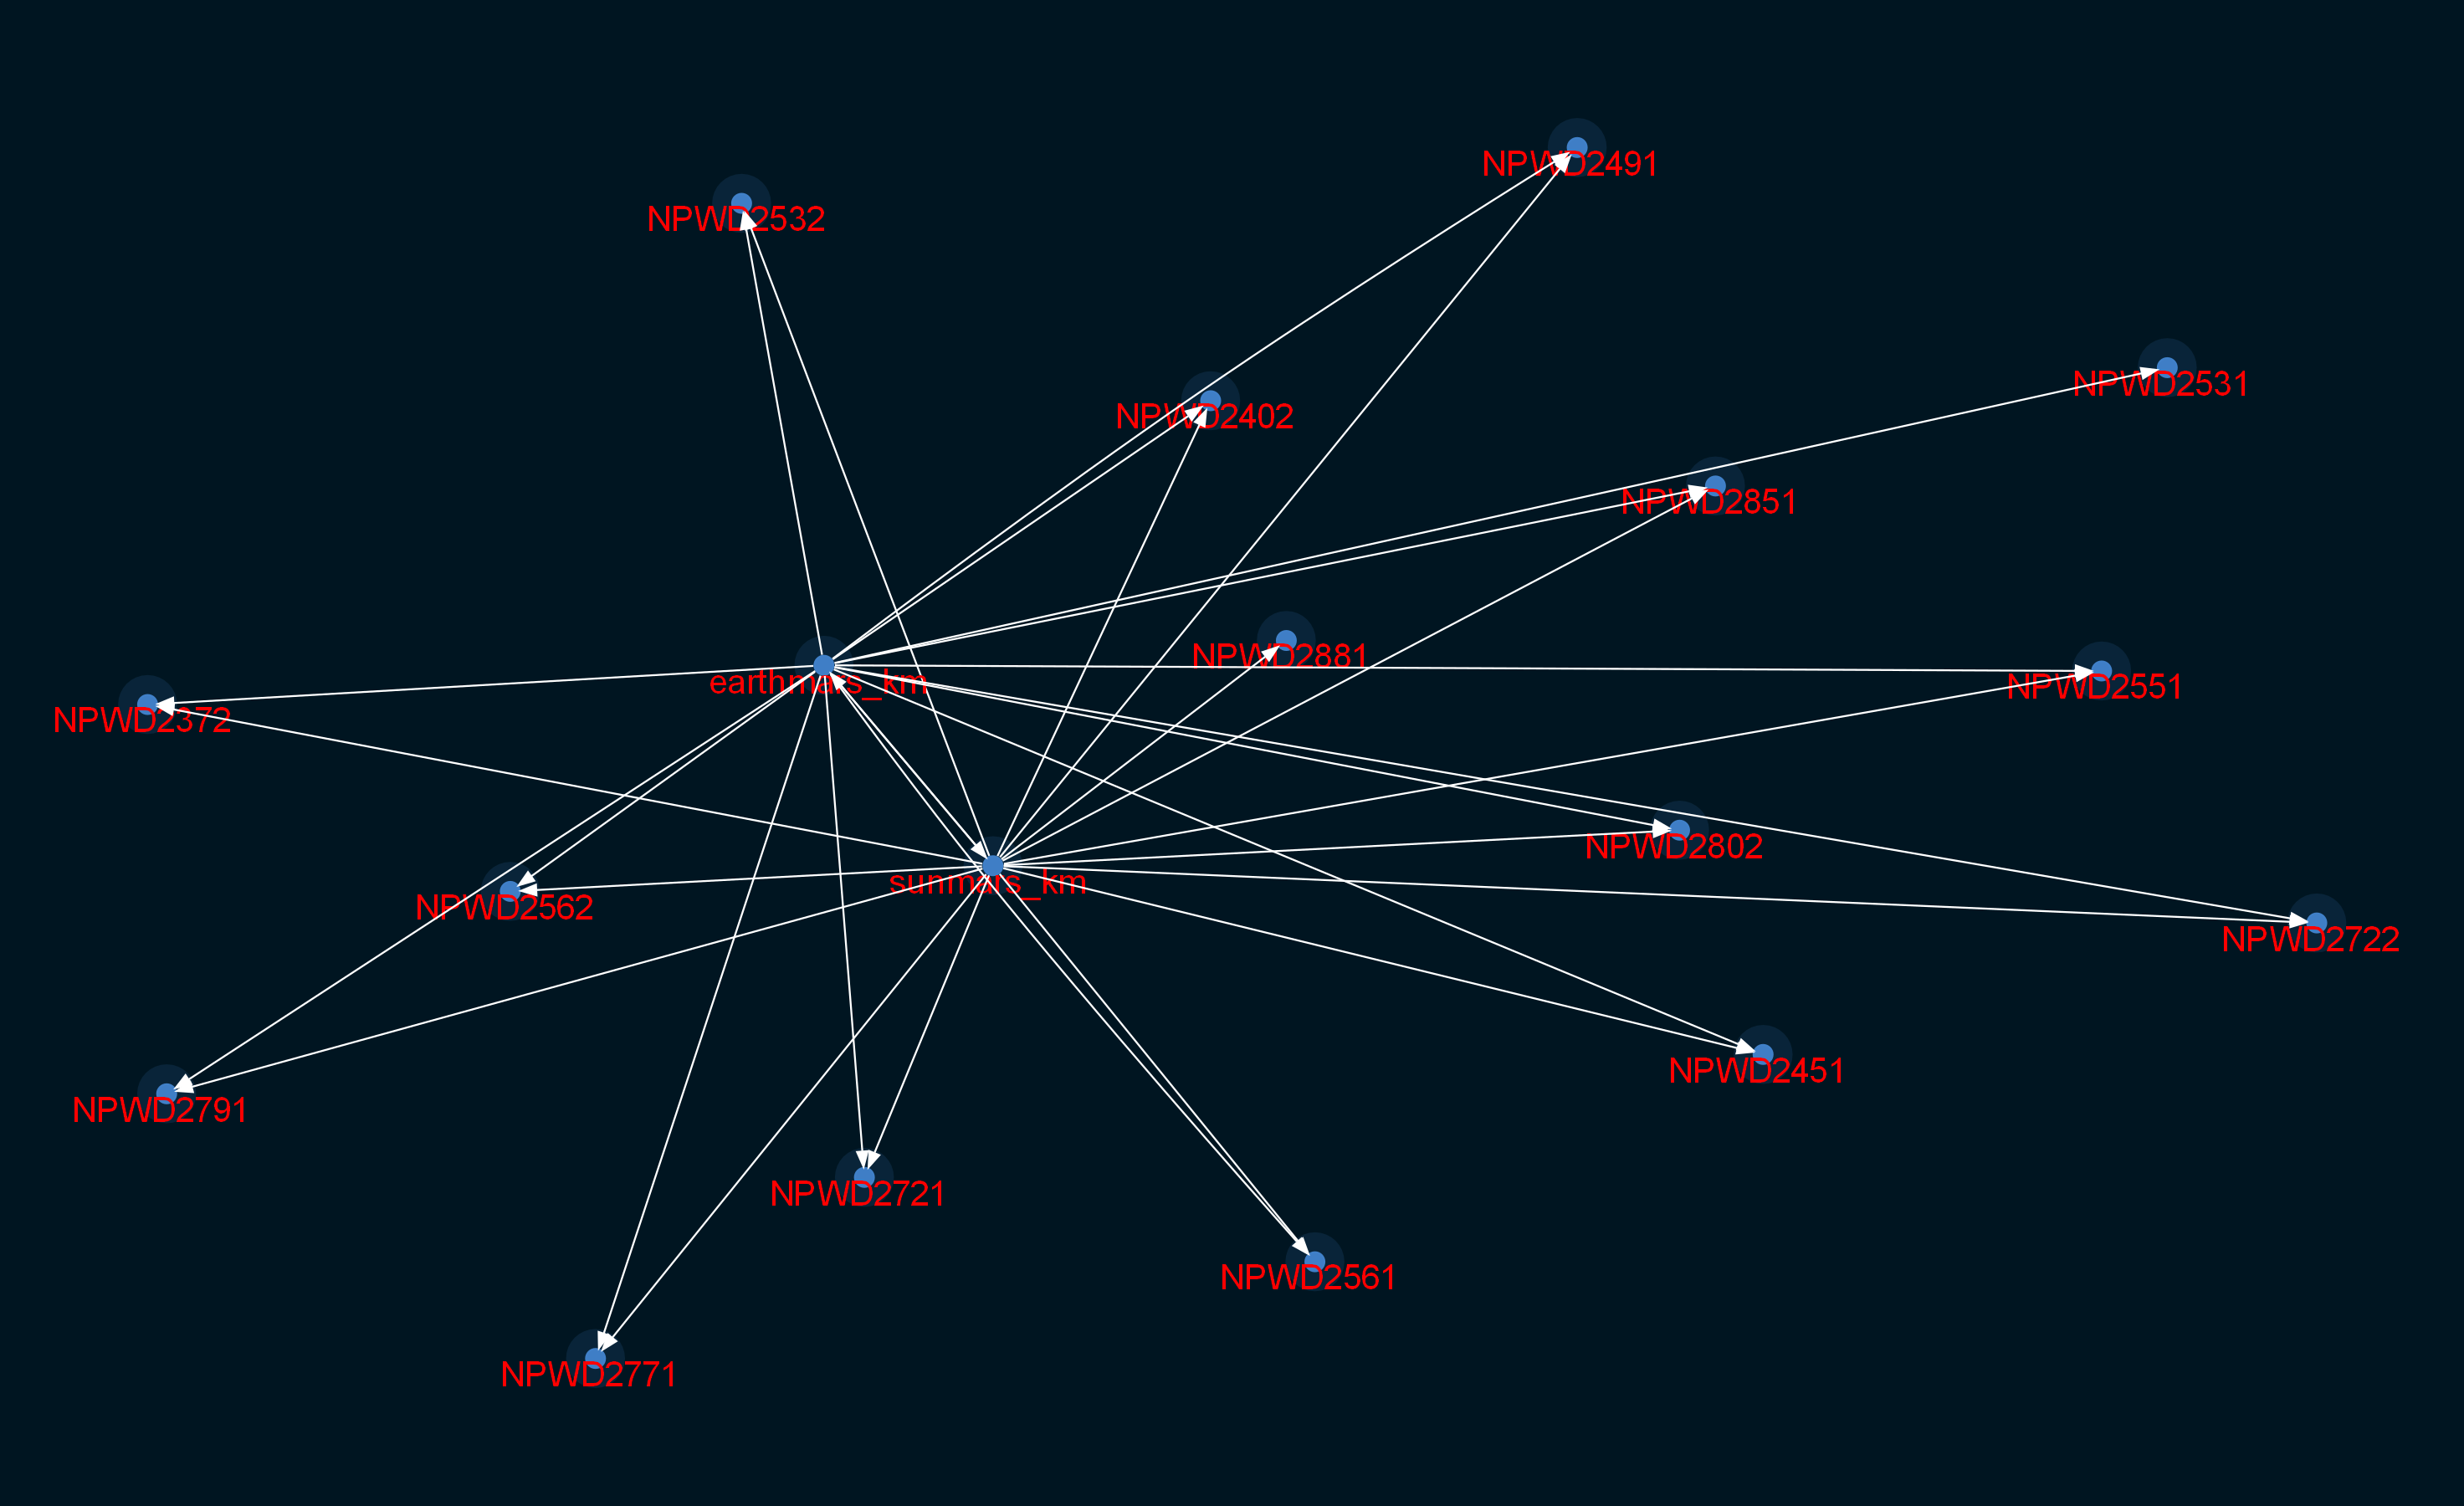

In [7]:
# Aunque la media no es un valor muy representativo por quedar muy por encima de los tres cuartiles, la elegiremos en este caso para compensar la gran cantidad de pesos demasiado pequeños.
# Utilizaremos esta media para quedarnos solo con aquellos nodos con pesos que la superen y utilizarla como umbral de pesos en el grafo. 
mean = 9.972310e-11
a.reset_threshold(mean)
viz = a.get_graph(nodes=npwd_nodes)

Image(viz.draw(format="png"))

Run Image(result.draw(format='png')) to draw the graph


C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


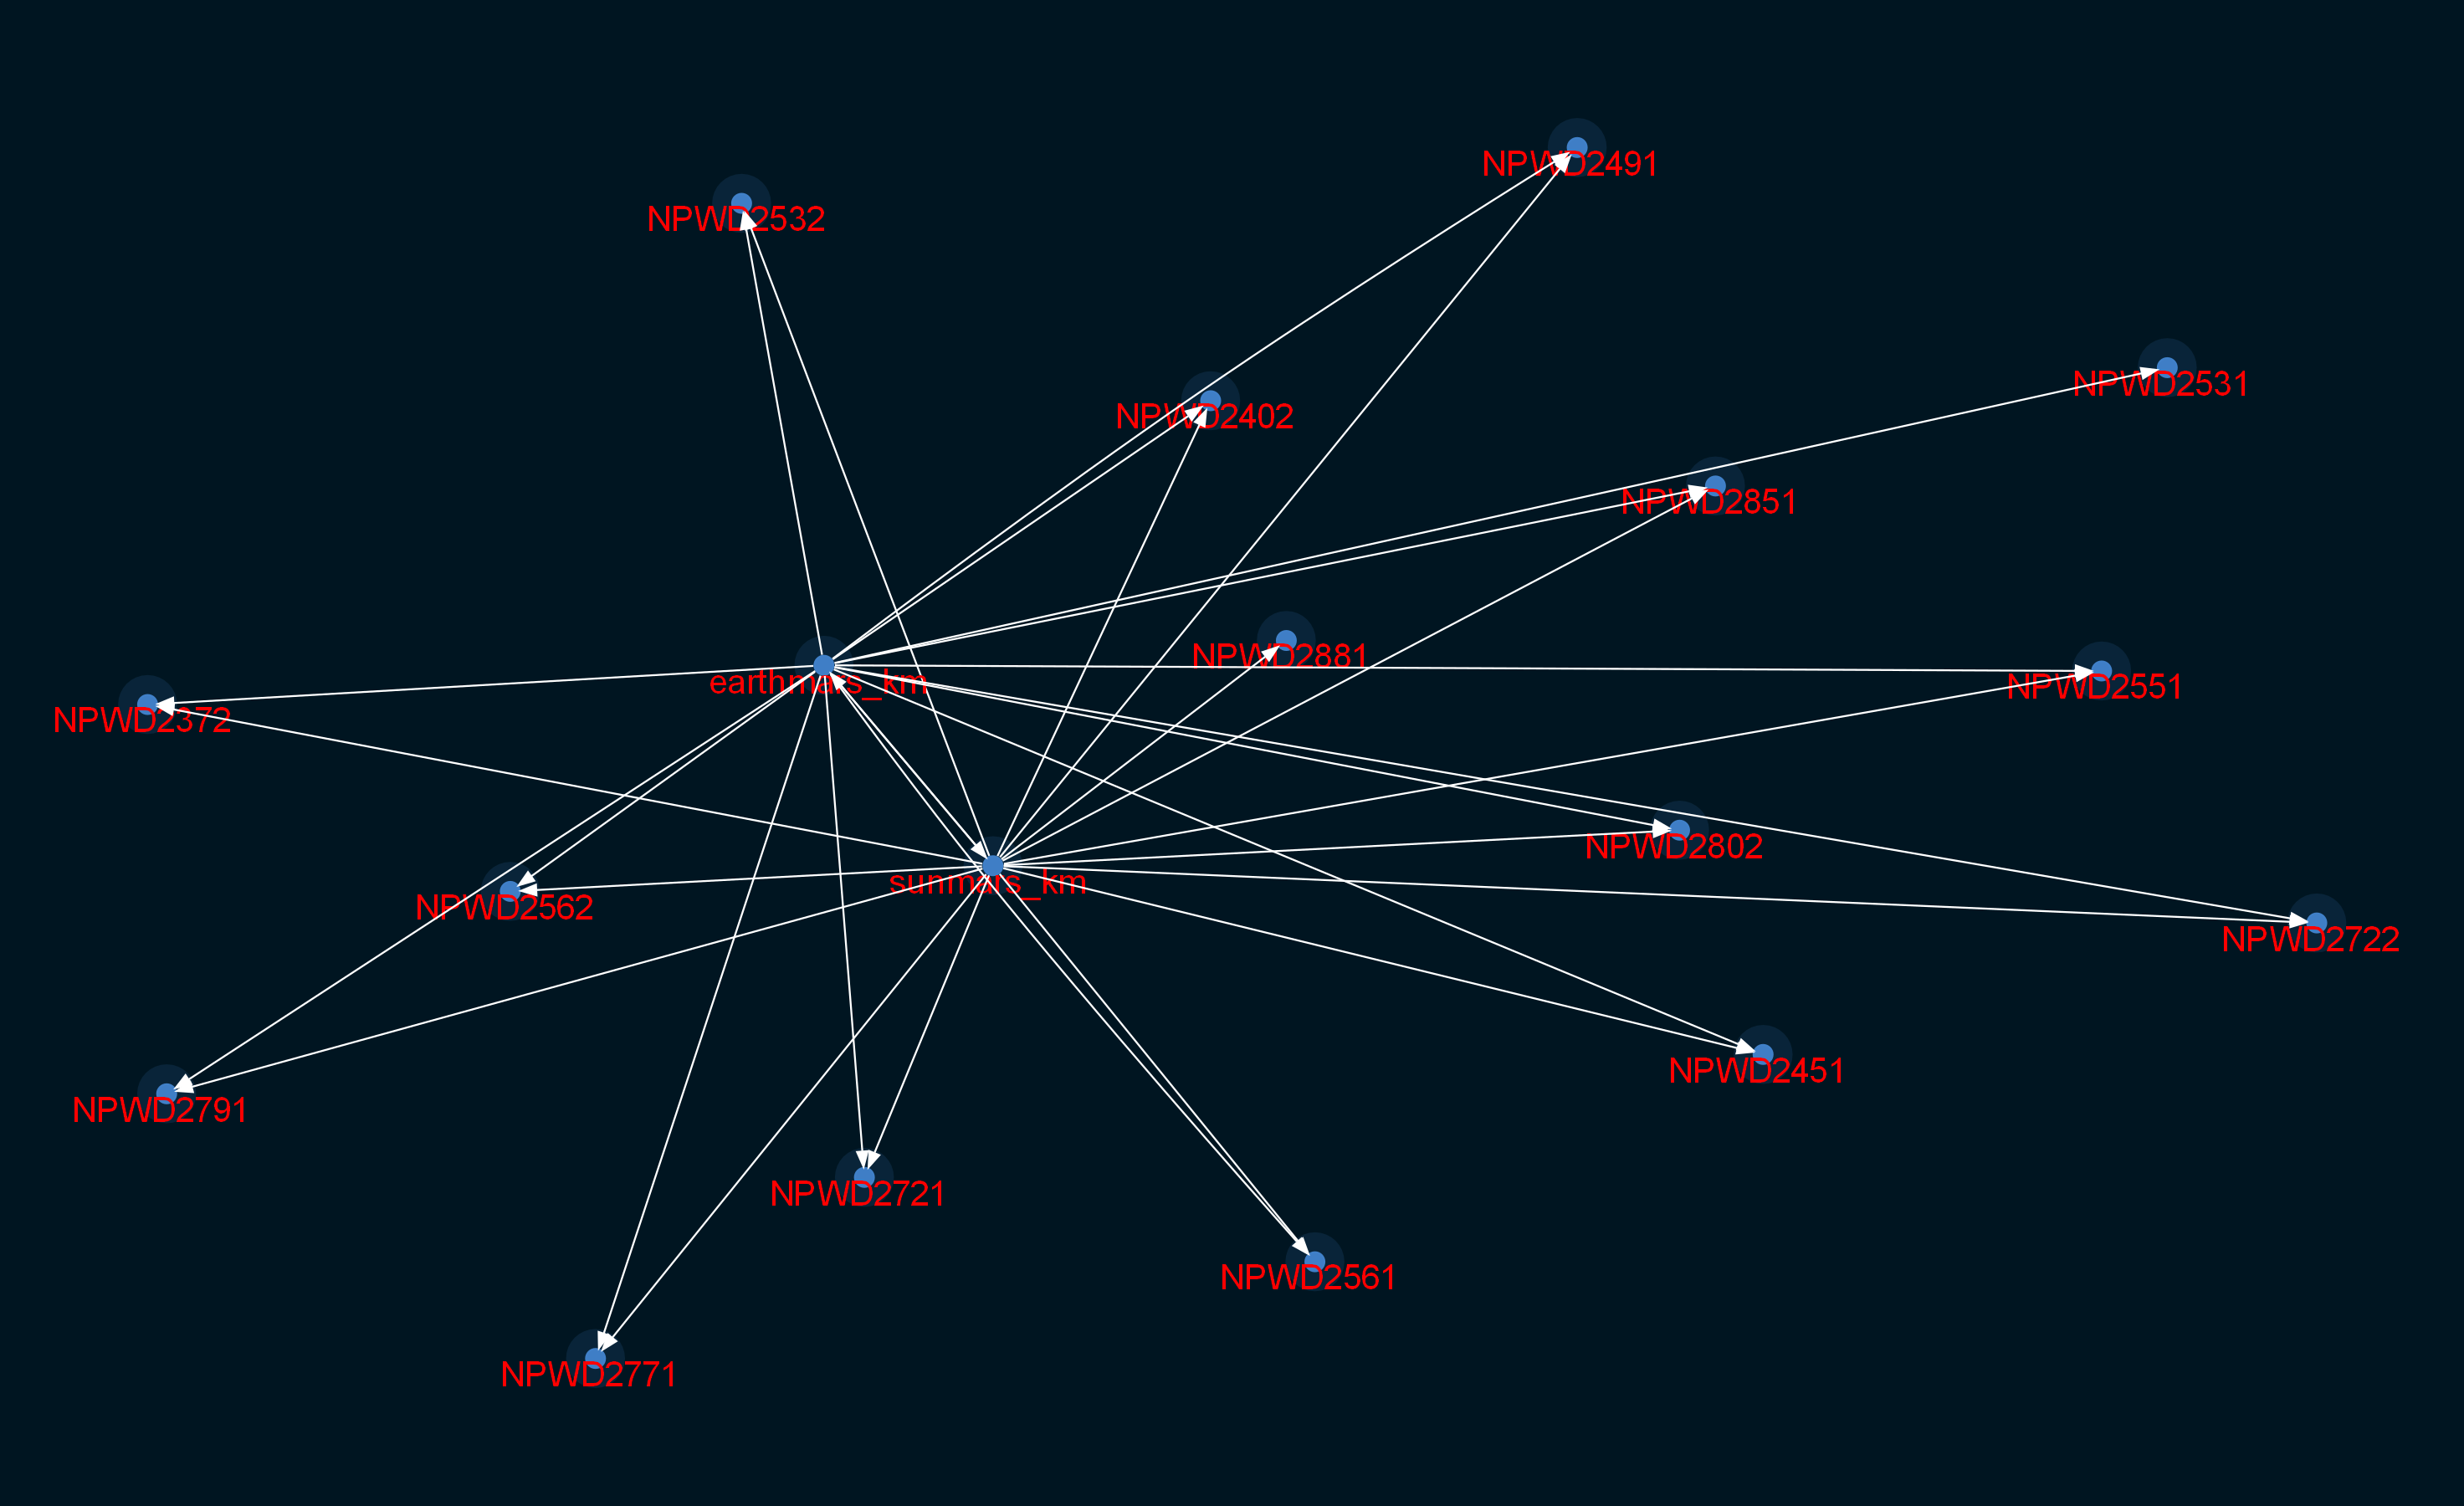

In [5]:
# Es difícil de imaginar cómo las corrientes NPWD pueden influir en la distancia de marte al sol y a la tierra. Nos quedamos solo con relaciones de NPWD a sunmars_km y earthmars_km
# Primero seleccionamos estas aristas del grafo en el dataframe y después las descartamos en nuestro objeto de CausalnexDataset.
# Representamos el grafo resultante

edges = a.get_all_edges()

edges_to_remove = [(u, v) for u, v, w in edges if "NPWD" in u]

a.remove_edges(edges_to_remove)

viz = a.get_graph(nodes=npwd_nodes)

Image(viz.draw(format="png"))
